In [1]:
import datetime as dt
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import warnings
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from scipy.stats.stats import pearsonr
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from statsmodels.graphics.gofplots import qqplot
from tqdm import tqdm_notebook as tqdm

warnings.filterwarnings('ignore')

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# read final processed data
df = pd.read_csv('inputs/final_processed_data.csv')
df.head()

,center,back,wing,line,height,matches_year1,goals_year1,matches_year2,goals_year2,goals_per_match_year1,goals_per_match_year2,goals_per_match_year3,N
0,0,0,0,1,165,11,29,29,148,2.636364,5.103448,5.238095,1
1,0,0,0,1,167,4,8,1,1,2.000000,1.000000,0.700000,1
2,0,0,0,1,167,27,71,24,30,2.629630,1.250000,2.360000,1
3,0,0,0,1,168,20,10,32,50,0.500000,1.562500,2.458333,1
4,0,0,0,1,168,20,53,26,65,2.650000,2.500000,1.388889,1


In [3]:
# shuffle the data
data = df
data = data.drop('N', 1)

data = data.sort_values(by=['goals_per_match_year3'])

y = data[['goals_per_match_year3']].values.astype('float32')

data = data.drop('goals_per_match_year3', 1)
x = data.values.astype('float32')

# split final processed data in training / testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(3132, 11)
(553, 11)
(3132, 1)
(553, 1)


In [4]:
def get_best_model(max_depth_list, min_samples_leaf_list, min_samples_split_list, max_features_list, \
                   X_train, y_train):
    best_score = -100
    
    for max_depth in tqdm(max_depth_list):
        for min_samples_leaf in min_samples_leaf_list:
            for min_samples_split in min_samples_split_list:
                for max_features in max_features_list:
                
                    model = RandomForestRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf, \
                                                  min_samples_split=min_samples_split)
                    model.fit(X_train, y_train)
                    scores = cross_val_score(model, X_train, y_train, cv=5)

                    val_score = scores.mean()

                    if val_score > best_score:
                        best_score = val_score
                        best_model = model
    
    return best_score, best_model

In [5]:
max_depth_list = [2,3,4,5,6,7,8,9,10,None]
min_samples_leaf_list = [1,2,5,8,10,15,20,50,100]
min_samples_split_list = [2,5,8,10,15,20,50,100]
max_features_list = [3,4,5,6,7,None]

best_score, best_model = get_best_model(max_depth_list, min_samples_leaf_list, min_samples_split_list, \
                                        max_features_list, X_train, y_train)

print('Cross validation score:', best_score)


Cross validation score: 0.4551062035203962


In [44]:
# score model on all data
y_pred = best_model.predict(x)
best_model.score(x, y)

0.47954228325172227

r2_score:  0.4795422832517222 



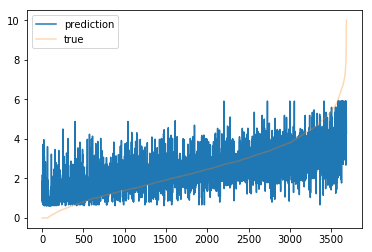

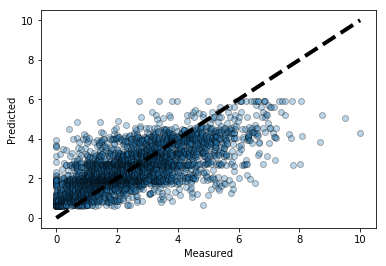

In [45]:
# plot graphs
print ("r2_score: ", r2_score(y, y_pred),"\n")

plt.plot(y_pred, label='prediction')
plt.plot(y, label='true',alpha =0.3)
plt.legend()
plt.show() 

fig, ax = plt.subplots()
ax.scatter(y, y_pred, edgecolors=(0, 0, 0),alpha =0.3)
ax.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [47]:
# score model on test data
y_pred = best_model.predict(X_test)
best_model.score(X_test, y_test)

0.4581862286006494

r2_score:  0.4581862286006494 



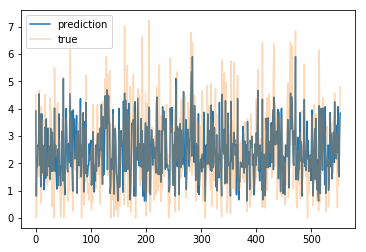

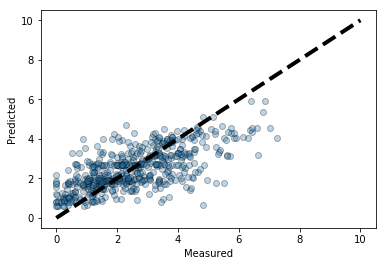

In [48]:
# plot graphs
print ("r2_score: ", r2_score(y_test, y_pred),"\n")

plt.plot(y_pred, label='prediction')
plt.plot(y_test, label='true',alpha =0.3)
plt.legend()
plt.show() 

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0),alpha =0.3)
ax.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [9]:
df = pd.read_csv('inputs/final_processed_data.csv')
df = shuffle(df, random_state=42)
df = df.head(5)
df

,center,back,wing,line,height,matches_year1,goals_year1,matches_year2,goals_year2,goals_per_match_year1,goals_per_match_year2,goals_per_match_year3,N
2023,0,1,0,0,180,18,8,26,15,0.444444,0.576923,0.900000,1
2587,0,1,0,0,194,30,36,30,21,1.200000,0.700000,0.500000,1
3222,1,0,0,0,175,30,16,30,13,0.533333,0.433333,1.333333,1
1263,0,0,1,0,183,28,56,30,70,2.000000,2.333333,1.700000,1
781,0,0,1,0,170,25,23,23,69,0.920000,3.000000,1.692308,1


In [10]:
# test model on some data
df = df.drop('N', 1)
df = df.drop('goals_per_match_year3', 1)

print(best_model.predict(df))

[0.94875173 1.27393449 0.94128555 2.12081752 2.67289043]


In [20]:
def is_center(position):
    if position == 'Middle Back':
        return 1
    else:
        return 0

def is_back(position):
    if position == 'Right Back' or position == 'Left Back' or position == 'Back':
        return 1
    else:
        return 0
    
def is_wing(position):
    if position == 'Right Wing' or position == 'Left Wing':
        return 1
    else:
        return 0
    
def is_line(position):
    if position == 'Line Player':
        return 1
    else:
        return 0

In [21]:
raw_df = pd.read_csv('inputs/raw_data.csv')

raw_df = raw_df.dropna()
raw_df = raw_df[(raw_df['height'] >= 120) & (raw_df['height'] <= 230)]
raw_df = raw_df[(raw_df['matches_year1'] > 0) & (raw_df['matches_year2'] > 0) & (raw_df['matches_year3'] > 0)]
raw_df = raw_df[(raw_df['goals_year1'] >= 0) & (raw_df['goals_year2'] >= 0) & (raw_df['goals_year3'] >= 0)]
raw_df = raw_df[raw_df['position'].isin(['Middle Back','Left Wing','Right Back','Right Wing','Line Player',\
                                         'Left Back','Back'])]
raw_df = raw_df[raw_df['prediction_season'] != '2018/2019']

raw_df['goals_per_match_year1'] = raw_df['goals_year1'] / raw_df['matches_year1']
raw_df['goals_per_match_year2'] = raw_df['goals_year2'] / raw_df['matches_year2']
raw_df['goals_per_match_year3'] = raw_df['goals_year3'] / raw_df['matches_year3']

raw_df['center'] = raw_df.apply(lambda row: is_center(row['position']), axis=1)
raw_df['back'] = raw_df.apply(lambda row: is_back(row['position']), axis=1)
raw_df['wing'] = raw_df.apply(lambda row: is_wing(row['position']), axis=1)
raw_df['line'] = raw_df.apply(lambda row: is_line(row['position']), axis=1)

for index, row in tqdm(raw_df.iterrows()):
    entry = pd.DataFrame({
            'center': np.array([row['center']]),
            'back': np.array([row['back']]),
            'wing': np.array([row['wing']]),
            'line': np.array([row['line']]),
            'height': np.array([row['height']]),
            'matches_year1': np.array([row['matches_year1']]),
            'goals_year1': np.array([row['goals_year1']]),
            'matches_year2': np.array([row['matches_year2']]),
            'goals_year2': np.array([row['goals_year2']]),
            'goals_per_match_year1': np.array([row['goals_per_match_year1']]),
            'goals_per_match_year2': np.array([row['goals_per_match_year2']])})
    
    raw_df.loc[index, 'predicted_goals_per_match'] = best_model.predict(entry)[0]
    
raw_df.head()

,name,position,height,matches_year1,goals_year1,matches_year2,goals_year2,matches_year3,goals_year3,prediction_season,goals_per_match_year1,goals_per_match_year2,goals_per_match_year3,center,back,wing,line,predicted_goals_per_match
0,Tim Kneule,Middle Back,190,33,31,10,0,31,76,2012/2013,0.939394,0.000000,2.451613,1,0,0,0,1.472374
1,Tim Kneule,Middle Back,190,10,0,31,76,33,107,2013/2014,0.000000,2.451613,3.242424,1,0,0,0,2.211225
2,Tim Kneule,Middle Back,190,31,76,33,107,34,83,2014/2015,2.451613,3.242424,2.441176,1,0,0,0,2.796429
3,Tim Kneule,Middle Back,190,33,107,34,83,34,71,2015/2016,3.242424,2.441176,2.088235,1,0,0,0,2.281911
4,Tim Kneule,Middle Back,190,34,83,34,71,26,74,2016/2017,2.441176,2.088235,2.846154,1,0,0,0,2.159384


In [22]:
prediction_df = raw_df[['name','position','prediction_season','predicted_goals_per_match','goals_per_match_year3']]
prediction_df = prediction_df.rename(columns = {'goals_per_match_year3':'actual_goals_per_match'})
prediction_df.head()

,name,position,prediction_season,predicted_goals_per_match,actual_goals_per_match
0,Tim Kneule,Middle Back,2012/2013,1.472374,2.451613
1,Tim Kneule,Middle Back,2013/2014,2.211225,3.242424
2,Tim Kneule,Middle Back,2014/2015,2.796429,2.441176
3,Tim Kneule,Middle Back,2015/2016,2.281911,2.088235
4,Tim Kneule,Middle Back,2016/2017,2.159384,2.846154


In [23]:
prediction_df.to_csv('predicted_data.csv', sep=',', index=False)

In [27]:
df = prediction_df.copy(deep=False)
df['prediction_diff'] = abs(df['predicted_goals_per_match'] - df['actual_goals_per_match'])
df = df.sort_values(by='prediction_diff', ascending=True)
df

,name,position,prediction_season,predicted_goals_per_match,actual_goals_per_match,prediction_diff
2873,Daniel Luther,Left Back,2017/2018,2.036682,2.037037,0.000355
3584,Jean Loup Faustin,Middle Back,2015/2016,0.799602,0.800000,0.000398
804,Lukas Frühstück,Middle Back,2016/2017,2.159384,2.160000,0.000616
1415,Kim Ekdahl du Rietz,Left Wing,2014/2015,3.139548,3.138889,0.000659
3481,Oliver Scheuner,Right Wing,2016/2017,1.847751,1.850000,0.002249
1298,Olha Nikolayenko,Right Back,2014/2015,4.553250,4.555556,0.002306
3185,Dimitrij Küttel,Right Back,2015/2016,1.856423,1.852941,0.003482
776,Žarko Šešum,Left Back,2012/2013,2.796429,2.800000,0.003571
1097,Victor Megias Andres,Left Back,2014/2015,1.960528,1.964286,0.003758
3698,Ramon Horler,Right Wing,2016/2017,1.696157,1.700000,0.003843


In [51]:
df.groupby('name').agg({'prediction_diff':'mean','prediction_season':'count'})\
  .reset_index().sort_values(by='prediction_diff', ascending=True)

,name,prediction_diff,prediction_season
1119,Robin John,0.007578,1
1112,Rickard Akerman,0.013118,1
1081,Povilas Babarskas,0.013307,1
1259,Thomas Zirn,0.014780,1
871,Mayuko Ishitate,0.016423,1
440,Gonzalo Carro Castro,0.020190,1
364,Fabian Höpfner,0.027414,1
1216,Stella Kramer,0.030155,1
1090,Ramon Horler,0.031111,2
543,Jennifer Issifou,0.041332,1


In [49]:
df[df['name'] == 'Robin John']

,name,position,prediction_season,predicted_goals_per_match,actual_goals_per_match,prediction_diff
2518,Robin John,Right Back,2014/2015,2.992422,3.0,0.007578


In [53]:
df[df['name'] == 'Lorenz Bosch']

,name,position,prediction_season,predicted_goals_per_match,actual_goals_per_match,prediction_diff
2448,Lorenz Bosch,Left Wing,2016/2017,1.856423,1.875000,0.018577
2447,Lorenz Bosch,Left Wing,2015/2016,1.710695,1.772727,0.062033
2449,Lorenz Bosch,Left Wing,2017/2018,1.895298,1.769231,0.126067


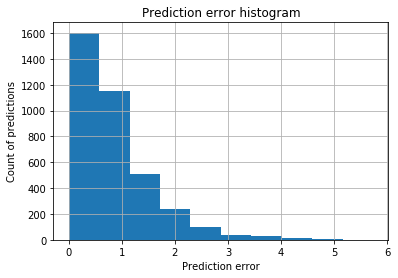

In [42]:
df.hist(column='prediction_diff')
plt.title('Prediction error histogram')
plt.xlabel('Prediction error')
plt.ylabel('Count of predictions')
plt.show()